# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

# Bibliotecas

In [ ]:
# importando bibliotecas
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Lendo o csv e primeiros tratamentos

In [17]:
# carregando o dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
# tratando a coluna gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [20]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


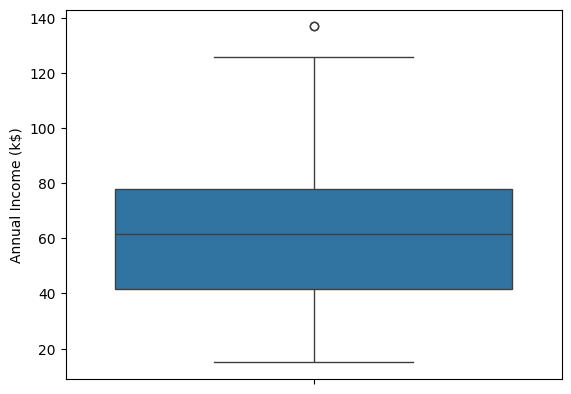

In [21]:
# obsevando possiveis outliers em Age e Annual Income (k$)
sns.boxplot(df['Annual Income (k$)'])
plt.show()

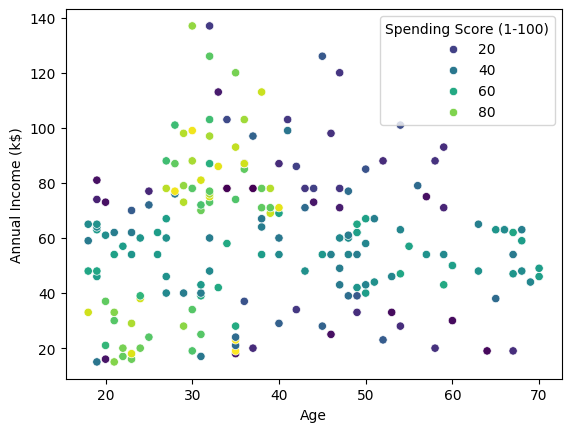

In [22]:
# dispersão entre age e annual income
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', 
                hue='Spending Score (1-100)', palette='viridis')
plt.show()

Por mais que o boxplot tenha indicado a presença de um outlier em Annual Income, ao analisar a dispersão dos dados decidi mantê-lo. Isso porque, neste contexto, o outlier faz sentido dentro do conjunto, já que está próximo do valor máximo do boxplot e não aparenta ser um erro de digitação ou um dado capaz de comprometer a generalização do modelo.

In [23]:
# removendo a coluna CustomerID
df = df.drop(columns=['CustomerID'])

# Análise exploratória

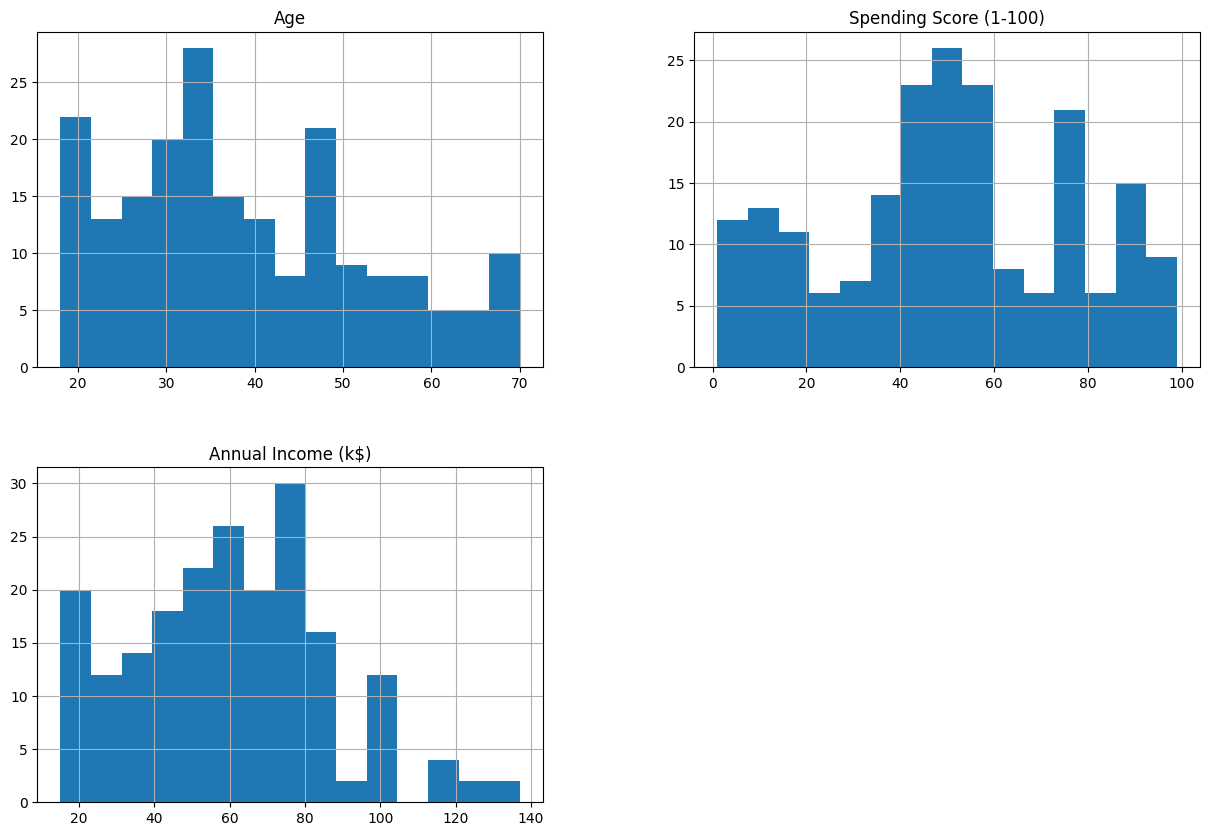

In [24]:
# observando a distribuição das variáveis numéricas
df[['Age', 'Spending Score (1-100)','Annual Income (k$)']].hist(bins=15, figsize=(15, 10))
plt.show()

Os dados não apresentam uma distribuição normal, mas um ponto interessante é que as distribuições de Age e Annual Income se assemelham. Isso provavelmente acontece porque as pessoas tendem a evoluir na carreira até os 30-40 anos e depois se estabilizam, o que também pode estar relacionado ao fato de a maioria dos valores de Spending Score se concentrarem próximos da mediana.

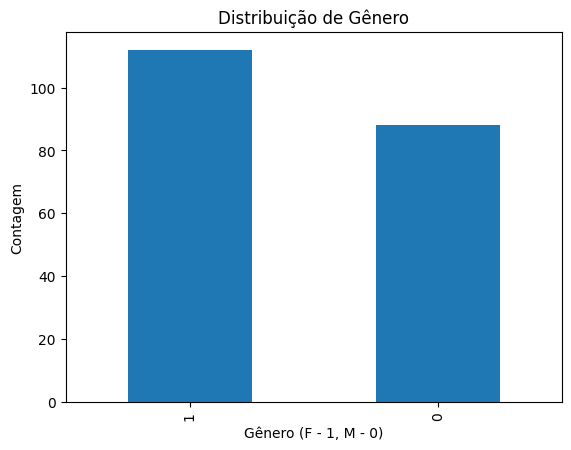

In [25]:
# Observando a distribuição de gênero
df.Gender.value_counts().plot(kind='bar')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero (F - 1, M - 0)')
plt.ylabel('Contagem')
plt.show()

In [40]:
df.Gender.value_counts()

Gender
1    112
0     88
Name: count, dtype: int64

A distribuição de gênero não é muito desbalanceada, os dados seguem uma distribuição de ~55% mulheres e ~45% homens

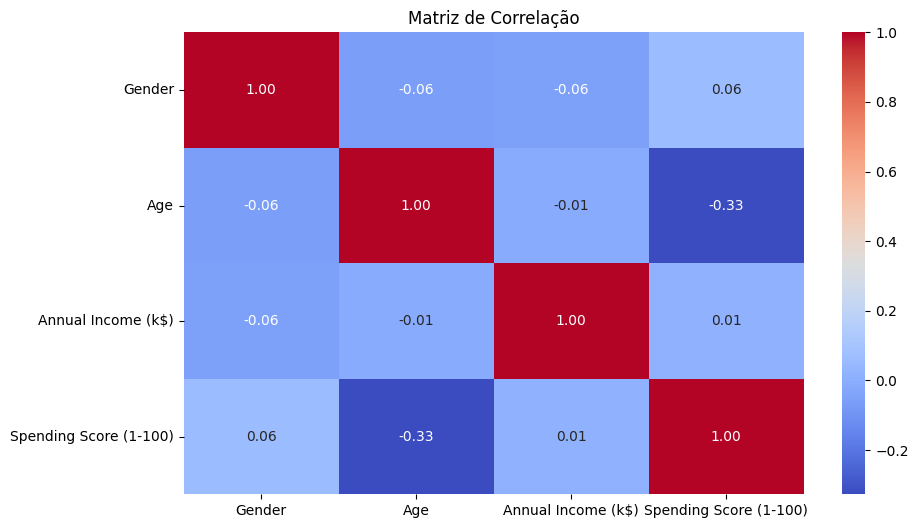

In [26]:
# observando a correlação entre as variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

Observando a matriz de correlação, as variáveis que apresentam uma dinâmica interessante são Age e Spending Score (1-100), com uma correlação de -0,33. Isso indica que, conforme a idade aumenta, o Spending Score tende a diminuir, e vice-versa. Apesar de não ser uma correlação forte, faz sentido interpretar esse padrão: à medida que envelhecem, as pessoas tendem a sair menos de casa, exceto para cumprir obrigações, o que pode resultar em menor consumo e, consequentemente, em um Spending Score mais baixo entre clientes de idades mais avançadas.

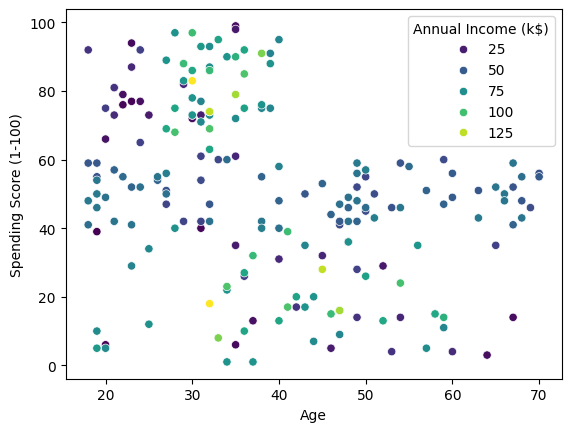

In [27]:
# dispersão entre Age e Spending Score (1-100)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Annual Income (k$)', palette='viridis')
plt.show()

Observando o gráfico de dispersão, consigo identificar quatro grupos: pessoas mais jovens com Spending Score alto/médio; pessoas de meia-idade com Spending Score mais baixo; e pessoas de meia-idade/idosos com Spending Score médio. Ainda assim, para definir melhor o número de clusters, vou aplicar o método do cotovelo.

Outro ponto interessante é que, embora a maioria das pessoas na faixa de Spending Score entre 40-60 tenha salário anual em torno de 50k, existe uma concentração de indivíduos que ganham 25k com Spending Score entre 70-100 junto de pessoas com salários acima de 75k. O que diferencia esses grupos é a idade: os de menor salário estão entre 20-30 anos, enquanto os de maior salário concentram-se entre 30-40 anos. Talvez seja interessante investigar mais a fundo esses padrões e observar outros comportamentos para desenvolver estratégias de marketing diferenciadas para esses clientes, já que as preocupações e prioridades de consumo tendem a mudar com a idade.

# Padronizando o dataset

In [28]:
# padronizando o dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Decidi padronizar os valores por causa das escalas, por mais que os valores das colunas não se distanciam imensamente uma das outras, padronizar pareceu a melhor opção para garantir uma escala normal entre os dados do dataset

# Aplicando o método do cotovelo para descobrir o número de clusters ideal

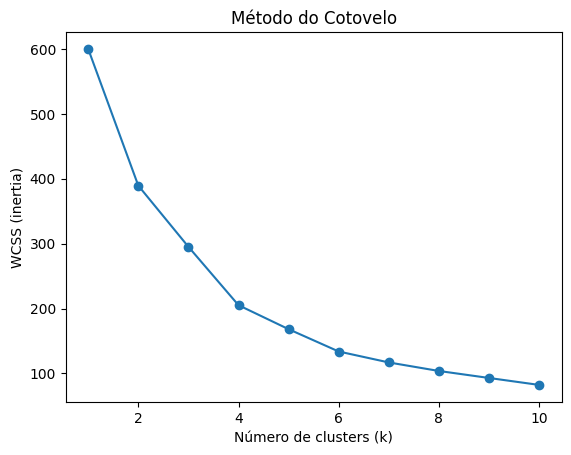

In [29]:
# aplicando o método do cotovelo para descobrir o número de clusters ideal

wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) 

plt.plot(K, wcss, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Método do Cotovelo")
plt.show()

O número ideal de clusters aparenta ser 4-6 de acordo com o resultado plotado no gráfico.

# Aplicando o KMeans no dataset

In [30]:
# aplicando o algoritmo KMeans com o número de clusters ideal
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(df_scaled)

# adicionando a coluna de clusters ao dataset original
df['Cluster'] = kmeans.labels_

In [31]:
# revertendo a padronização para interpretar os centroides
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

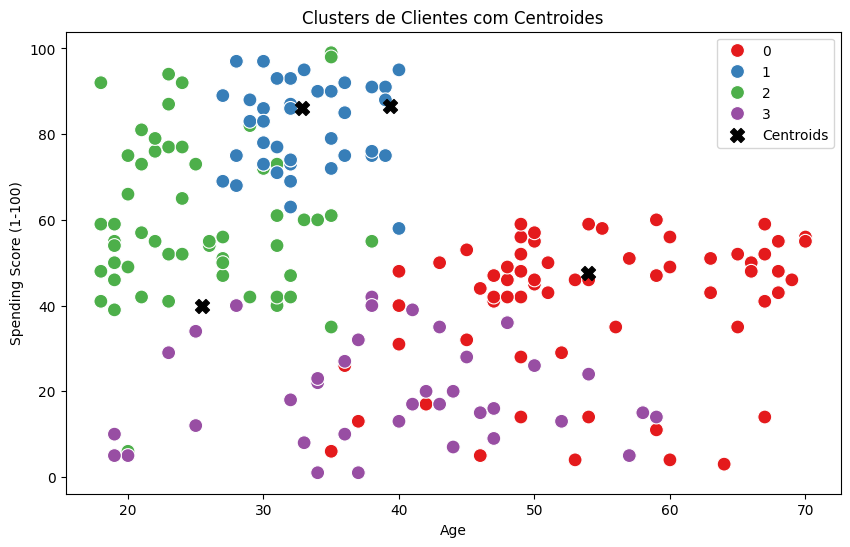

In [32]:
# avaliando os clusters formados destacando os centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')
plt.title('Clusters de Clientes com Centroides')
plt.legend()
plt.show()

A divisão de quatro clusters parece quase satisfatória, apenas com um pouco de overlap entre os clusters 1 e 3, e também o grupo 2 pode possívelmente ser dividido em dois grupos, um de pessoas com o score mais próximo da média e outro de clientes com scores mais altos. Com este resultado é possível segmentar os clientes em quatro grupos: 

- **1°.Cluster 0 - Clientes de meia idade com um Spending Score mediano**

- **2°. Cluster 1 - Clientes entre 30-40 anos com um Spending Score alto**

- **3°. Cluster 2 - Clientes entre 20-35 variando um spending score médio-alto**

- **4°. Cluster 3 - Clientes com uma faixa etária abrangente com spending scores mais baixos.** 

# Ajustando Hiperparâmetros na tentativa de otimizar a performance do modelo

In [33]:
# ajustando hiperparâmetros
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30,'auto'],
    'max_iter': [100, 200, 300, 400],
    'algorithm': ['lloyd', 'elkan']
    }

grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid, cv=5, n_jobs=1)
grid_search_kmeans.fit(df_scaled)

print("Melhores hiperparâmetros:", grid_search_kmeans.best_params_)

Melhores hiperparâmetros: {'algorithm': 'lloyd', 'init': 'random', 'max_iter': 100, 'n_clusters': 6, 'n_init': 10}


In [34]:
# selecionando o melhor modelo
best_kmeans = grid_search_kmeans.best_estimator_
best_kmeans.fit(df_scaled)


df['Cluster_best_kmeans'] = best_kmeans.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_best_kmeans
0,0,19,15,39,2,5
1,0,21,15,81,2,5
2,1,20,16,6,2,0
3,1,23,16,77,2,5
4,1,31,17,40,2,0


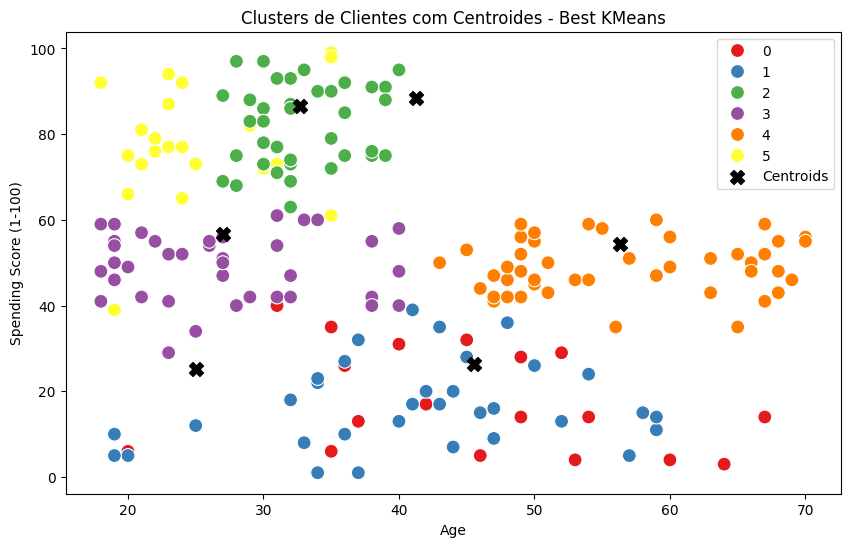

In [36]:
# observando os clusters formados pelo melhor modelo
centroids_best = scaler.inverse_transform(best_kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster_best_kmeans', palette='Set1', s=100)
plt.scatter(centroids_best[:, 0], centroids_best[:, 1], s=100, c='black', marker='X', label='Centroids')
plt.title('Clusters de Clientes com Centroides - Best KMeans')
plt.legend()
plt.show()

O resultado do KMeans com o GridSearch foi interessante, utilizando um número de clusters maior, o algoritmo coseguiu definir melhor a clientela, separando o grupo de clientes de "luxo" de 20-30 anos do grupo de clientes com o spending score mediano na mesma idade, porém 6 clusters parece desnecessário, já que os clusters 0 e 1 se sobrepõem tanto, talvez uma tentativa de retreinar o modelo novamente com 5 clusters traga o resultado que estou buscando

# Retreinando o Modelo com 5 clusters

In [37]:
# testando com 5 clusters
kmeans_5_clusters = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans_5_clusters.fit(df_scaled)

df['Cluster_5'] = kmeans_5_clusters.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_best_kmeans,Cluster_5
0,0,19,15,39,2,5,2
1,0,21,15,81,2,5,2
2,1,20,16,6,2,0,3
3,1,23,16,77,2,5,2
4,1,31,17,40,2,0,2


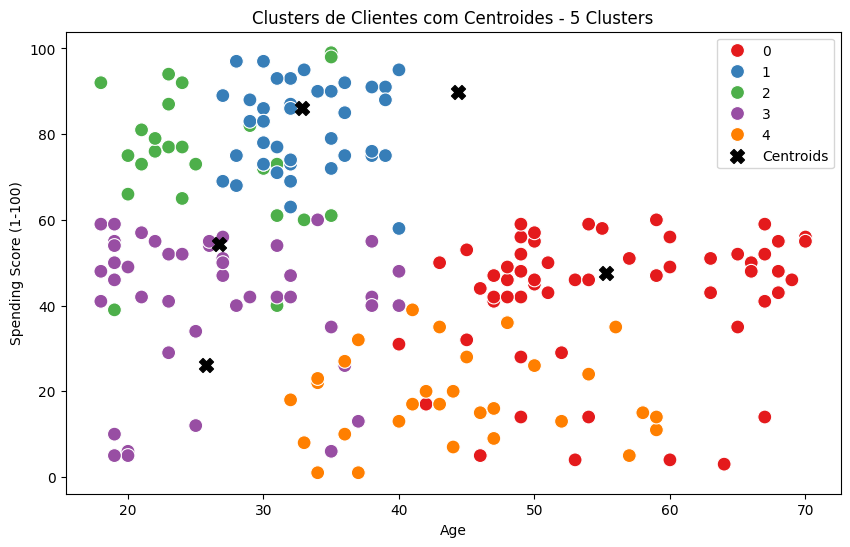

In [38]:
# avaliando os clusters formados
centroids_5 = scaler.inverse_transform(kmeans_5_clusters.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster_5', palette='Set1', s=100)
plt.scatter(centroids_5[:, 0], centroids_5[:, 1], s=100, c='black', marker='X', label='Centroids')
plt.title('Clusters de Clientes com Centroides - 5 Clusters')
plt.legend()
plt.show()

Acredito que a utilização de 5 clusters tenha trazido o melhor resultado, deixando os grupos mais compactos e clusterizando melhor a base de dados, os clusters encontrados são:

- **1°. Cluster 0 - Clientes entre 50-70 anos com um Spending Score mediano**

- **2°. Cluster 1 - Clientes entre 30-40 anos com um Spending Score alto**

- **3°. Cluster 2 - Clientes entre 20-35 anos com um Spending Score alto**

- **4°. Cluster 3 - Clientes entre 20-40 anos com um Spending Score concentrado na média** 

- **5°. Cluster 4 - Clientes entre 30-60 anos com um Spending Score abaixo da média**

# Avaliando resultados dos Três treinamentos

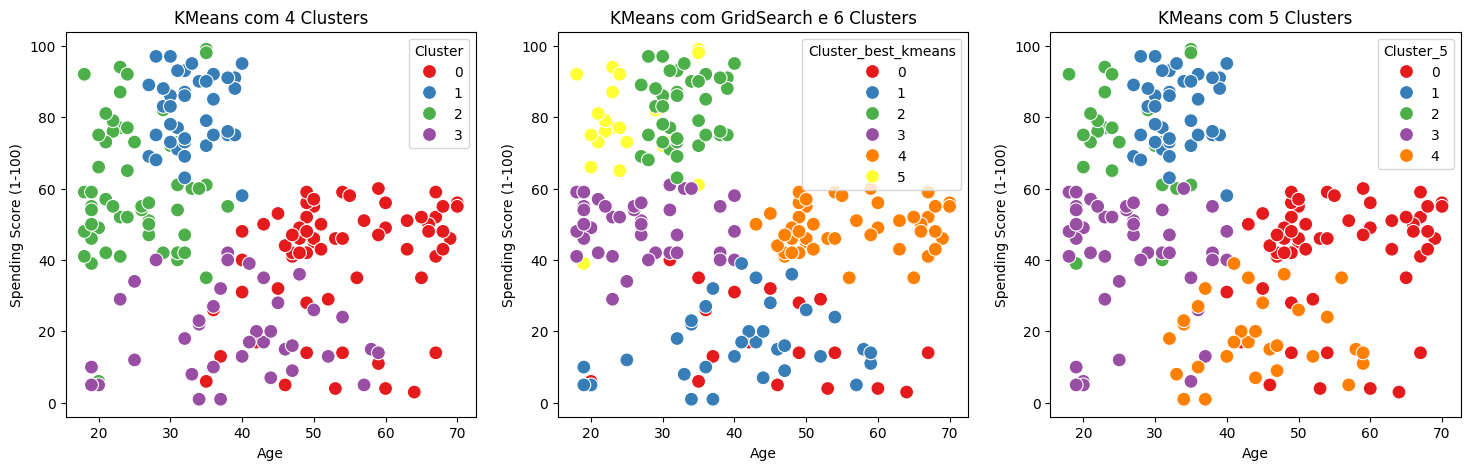

In [39]:
# Plotando os resultados dos Três treinamentos
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('KMeans com 4 Clusters')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster_best_kmeans', palette='Set1', s=100)
plt.title('KMeans com GridSearch e 6 Clusters')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster_5', palette='Set1', s=100)
plt.title('KMeans com 5 Clusters')
plt.show()

Avaliando os três treinamentos, acredito que o modelo treinado com 5 clusters tenha se saído melhor, pois a divisão da clientela ficou mais clara com grupos mais definidos, assim possibilitando insights mais precisos e valiosos para que o time de marketing possa desenvolver estratégias para manter os clientes de Scores altos e possivelmente aumentar os Scores dos clientes de grupos com um valor mais baixo

# Insights para estrátegia de marketing baseado na segmentação de clientes dos clusters

### Estratégia para aumento de receita e Spending Score geral do shopping

Proposta de criação de um programa de pontos vinculado a um cartão do shopping, similar aos cartões de lojas. Nesse modelo, clientes afiliados acumulam pontos conforme gastam em lojas parceiras, podendo utilizá-los posteriormente em cashback, produtos, descontos, estacionamento, entre outros benefícios.

Além disso, poderia ser criada uma versão premium do programa, acessível via assinatura ou automaticamente quando o cliente atingir determinado volume de gastos/pontos. No plano premium, os benefícios seriam mais atrativos, como:

- cashback direto, sem necessidade de gastar pontos;

- descontos reduzidos para resgate de prêmios;

- possibilidade de resgatar refeições específicas em restaurantes parceiros sem consumir o saldo acumulado.

Esse programa tende a aumentar a frequência e o ticket médio de consumo, pois os clientes se sentiriam motivados a concentrar suas compras no shopping para maximizar seus benefícios. Um diferencial estratégico é que ele também reduz a concorrência entre shoppings, já que frequentadores habituais de outros centros comerciais teriam agora um incentivo adicional para se fidelizar a apenas um local.

---

### Estratégia focada na faixa etária de 50-70 anos

Durante períodos de férias escolares e acadêmicas, poderiam ser realizados eventos em parceria com os cinemas para trazer de volta aos cartazes filmes antigos e icônicos, como ocorreu, por exemplo, nas comemorações de aniversário de Star Wars.

Essa ação tem potencial de atrair:

- o público mais velho (50-70 anos), movido pela nostalgia de rever filmes de sua época;

- famílias, já que filhos e netos poderiam convidar seus parentes mais velhos para compartilhar a experiência;

- cinéfilos em geral, interessados em clássicos, mesmo fora da faixa etária esperada.

Assim, além de atrair novos visitantes, a estratégia contribui para aumentar o tempo de permanência no shopping, estimulando consumo em alimentação, estacionamento e outras lojas antes ou depois da sessão.